In [26]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import random as rnd

Add salt and pepper noise :

In [27]:
def add_noise(img):
    row, column = img.shape
    number_of_pixel = rnd.randint(500, 50000)
    new_img = img.copy()
    for i in range(number_of_pixel):
        x = rnd.randint(0, column - 1)
        y = rnd.randint(0, row - 1)

        new_img[x][y] = 0

    number_of_pixel = rnd.randint(500, 50000)

    for i in range(number_of_pixel):
        x = rnd.randint(0, column - 1)
        y = rnd.randint(0, row - 1)

        new_img[x][y] = 255
    
    return new_img

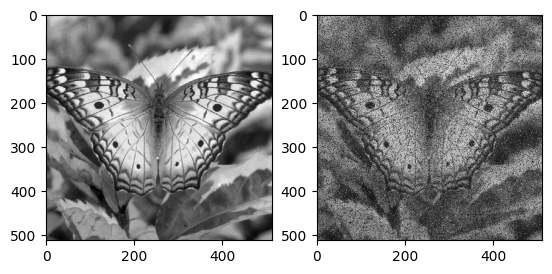

In [28]:
img = plt.imread('butterFly.gif')
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
# plt.show()
plt.subplot(1, 2, 2)
noise_img = add_noise(img)
plt.imshow(noise_img, cmap = 'gray')

3(a). Apply average and median spatial filters with 5x5 mask and observe their performance for noise supperssion in term of PSNR

In [29]:
def apply_filter(image, mask):
    considered_pixels = mask.copy()
    avarage_picture = image.copy()
    x , y = mask.shape
    height, width = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            for l in range(x):
                for r in range(y):
                    considered_pixels[l, r] = image[(l + i - (x // 2)) % height, (r + j - (y // 2)) % width]
            
            avarage_picture[i, j] = np.sum(considered_pixels * mask)
    return avarage_picture

In [30]:
def avarage_filter(image, mask):
    considered_pixels = mask.copy()
    avarage_picture = image.copy()
    x , y = mask.shape
    height, width = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            for l in range(x):
                for r in range(y):
                    considered_pixels[l, r] = image[(l + i - (x // 2)) % height, (r + j - (y // 2)) % width]
            
            avarage_picture[i, j] = np.mean(considered_pixels)
    return avarage_picture

In [31]:
def meiden_filter(image, mask):
    considered_pixels = mask.copy()
    avarage_picture = image.copy()
    x , y = mask.shape
    height, width = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            for l in range(x):
                for r in range(y):
                    considered_pixels[l, r] = image[(l + i - (x // 2)) % height, (r + j - (y // 2)) % width]
            
            avarage_picture[i, j] = np.median(considered_pixels)
    return avarage_picture

In [32]:
def harmonic_filter(image, mask):
    considered_pixels = mask.copy()
    avarage_picture = image.copy()
    x , y = mask.shape
    height, width = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            for l in range(x):
                for r in range(y):
                    considered_pixels[l, r] = image[(l + i - (x // 2)) % height, (r + j - (y // 2)) % width]
                    if(considered_pixels[l, r] == 0):
                        considered_pixels[l,r] = 1
            
            avarage_picture[i, j] = (x * y) / np.sum(1 / considered_pixels)
    return avarage_picture

In [33]:
def geo_filter(image, mask):
    considered_pixels = mask.copy()
    avarage_picture = image.copy()
    x , y = mask.shape
    height, width = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            for l in range(x):
                for r in range(y):
                    considered_pixels[l, r] = image[(l + i - (x // 2)) % height, (r + j - (y // 2)) % width]
                    if(considered_pixels[l, r] == 0):
                        considered_pixels[l,r] = 1
            
            avarage_picture[i, j] = np.prod(considered_pixels ** (1 / (x * y)))
    return avarage_picture

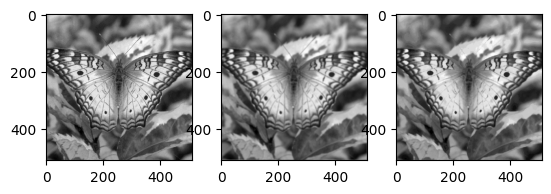

In [34]:

mask = np.ones((5,5))
average_picture = avarage_filter(img, mask)
median_picture = meiden_filter(img, mask)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(average_picture, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(median_picture, cmap = 'gray')
plt.show()


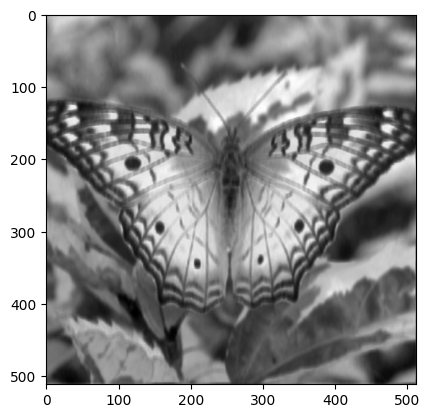

In [35]:
mask = np.ones((7,3))
harmonic = harmonic_filter(img, mask)
plt.imshow(harmonic, cmap = 'gray')
plt.show()

In [36]:
def PSNR(image_1, image_2):
    assert(image_1.shape == image_2.shape)
    mse = np.mean((image_1 - image_2) ** 2)
    max_level = 255
    return 20 * np.log10(max_level / np.sqrt(mse))

In [37]:
print(PSNR(img, noise_img))

35.78147174044835
